# D1AED – Anâlise Estâtísticâ pârâ Ciência de Dados

## Atividâde em Dupla 1

### Alunos
Evandro Henrique Couto de Paula. Prontuário: CP301358-8<br>
Jessé de Freitas. Prontuário:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Carregando datasets
movies = pd.read_csv('ml-latest-small/movies.csv')
links = pd.read_csv('ml-latest-small/links.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

#### Análise movies

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.shape

(9742, 3)

In [6]:
#Generos Disponíveis
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [7]:
genre_labels

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [8]:
#Separendo a coluna de generos e expandindo o resultado para um dataframe
genres_series = movies['genres'].str.split('|', expand=True)

#Agrupando o dataframe em uma serie
genres_series_to_count = genres_series.stack()

In [9]:
#Realizando a contragem de aparição de generos
genres_series_to_count.value_counts()

#Apresentando a contagem de categorias
genres_count = pd.DataFrame(genres_series_to_count.value_counts(), columns=['Count'])
genres_count.index.name = 'Genre'
genres_count

,Count
Genre,
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978


In [10]:
# pd.options.display.max_rows = 10
movies['title'] = movies['title'].str.strip()
movies['title'].str.slice(start=-5, stop=-1)
movies['release_year'] = movies['title'].str.slice(start=-5, stop=-1)
movies['release_year'] = movies.release_year.str.replace('\)','', regex=True)
movies['release_year'] = movies.release_year.str.replace('\(','', regex=True)
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='signed').astype(pd.Int64Dtype())
movies['release_year'].drop_duplicates()


0       1995
48      1994
54      1996
98      1976
105     1992
        ... 
8439    2015
8684    2016
8687    2017
8693    2018
9020    1908
Name: release_year, Length: 107, dtype: Int64

#### Análise links

In [11]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [12]:
links.shape

(9742, 3)

In [13]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


## Análise ratings

In [14]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
ratings.shape

(100836, 4)

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


/Users/evandrodepaula/Documents/pos/ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

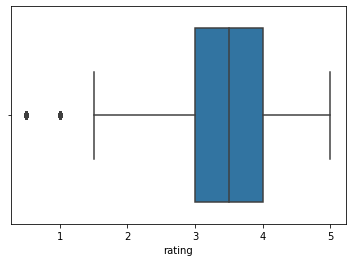

In [17]:
ratings_data  = ratings['rating'] 
sns.boxplot(ratings_data)

## Análise tags

In [18]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [19]:
tags.shape

(3683, 4)

In [20]:
tags['tag'].str.lower().drop_duplicates()

0                  funny
1        highly quotable
2           will ferrell
3           boxing story
4                    mma
              ...       
3676                70mm
3678           for katie
3679             austere
3680              gun fu
3681    heroic bloodshed
Name: tag, Length: 1475, dtype: object

In [21]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


# Fundindo datasets

In [22]:
movies_ratings = movies.merge(ratings,on='movieId')

In [23]:
movies_ratings.head()

,movieId,title,genres,release_year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.5,1305696483


In [24]:
movies_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [52]:
movies_rating_clear = movies_ratings[movies_ratings['release_year'].notna()]
movies_rating_clear.groupby('release_year')['rating'].mean()

release_year
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
1916    3.600000
          ...   
2014    3.512879
2015    3.410386
2016    3.387261
2017    3.578091
2018    3.483516
Name: rating, Length: 106, dtype: float64

In [67]:
medias_por_ano = movies_rating_clear.groupby('release_year').mean().rating
type(medias_por_ano)

pandas.core.series.Series

<AxesSubplot:ylabel='rating'>

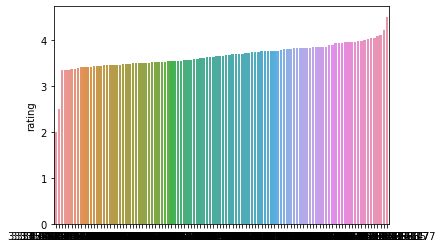

In [83]:
# medias_por_ano.plot(kind='hist', x=movies_rating_clear['release_year'], y= medias_por_ano )
# sns.histplot(medias_por_ano, x=medias_por_ano.index, y=medias_por_ano.values,bins=20)
sns.barplot(data=medias_por_ano, y=medias_por_ano.index, x=medias_por_ano.values)